# Analysis of a full dataset with `rootpy`
(**note** a lot of this tutorial draws comparisons with the `pyROOT` tutorial in this same repository)

This notebook follows closely the procedure of ```backgroundHists```, but stores the histograms in a different way to showcase the rootpy views system

Let's begin by loading some libraries and setting some global ROOT options.

In [1]:
from rootpy.io import root_open
from rootpy.tree import TreeChain
from rootpy.plotting import Hist, HistStack, Canvas, views, Legend
import ROOT
from glob import glob
from os import popen
ROOT.gStyle.SetOptStat(0)
ROOT.TH1.AddDirectory(False)

Welcome to JupyROOT 6.14/09


Now, let's create the histogram templates to have consistent binnings across the samples. `Rootpy` makes it very easy to create simple histograms as well as variable-binning ones

In [2]:
templates = {
    # Simple histogram
    'dijetMass' : Hist(100, 0, 100),
    # Variable-binned histogram
    'cosThetaStar' : Hist([0, 0.2, 0.5, 0.8, 0.9, 1.])
}

Compute the weights to be used for each sample, for a more detailed description have a look at the [backgroundHists notebook](../pyROOT_essentials/backgroundHists.ipynb)

In [3]:
from ConfigParser import RawConfigParser
config = RawConfigParser()   
config.optionxform = str
config.read("hatsConfig.ini")
crossSections = dict([sample, float(xsec)] for sample, xsec in config.items('hatsXsects'))
nProcessed    = dict([sample, int(nPro)] for sample, nPro in config.items('hatsNprocessed'))
weights = {}
luminosity = 1.42    # This is just an example value
for sample in crossSections.keys():
    weights[sample] = luminosity * crossSections[sample]/nProcessed[sample]

Now we can open our trees and produce the histograms we need.

Another bit of `rootpy` niceness is the ability to use python's `with` statement to open/write/close files. With `pyROOT`, you would have to perform something similar to the following once you're done modifying a ROOT file

```python
myFile.cd()
myTree.write()
myFile.close()
```

with the caveat that any exception might bypass those statements, leaving a corrupted ROOT file. `Rootpy`, on the other hand lets you handle the same with

```python
with root_open('testfile.root', 'w') as outfile
    # do some work
```

And python will guarantee that `testfile.root` will be properly written when the program exits.

Let's process all of our trees to produce a set of histograms and write to a file named `histograms.root`.

**NOTE** - to speed the process up for the interactive tutorial, we only iterate once. To produce all the histograms, remove the `break` statements.

In [4]:
with root_open('histograms.root', 'w') as outfile:
    for sample in weights:
        print 'creating histograms for', sample
        sample_dir = outfile.mkdir(sample)
        sample_dir.cd()
        #get all the root files in the direcotry
        inFiles = []
        for inFile in filter(None,popen("xrdfs root://se11.accre.vanderbilt.edu:1095/ ls /store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_%s/" % sample).read().split('\n')):
            inFiles.append("root://cmseos.fnal.gov/%s" % inFile.replace("//", "/"))
        chain = TreeChain(
            'hatsDijets',
            inFiles
        )
        for varname, template in templates.iteritems():
            out_hist = chain.Draw(varname, hist=template.Clone())
            sample_dir.WriteTObject(out_hist, varname)

creating histograms for QCD_HT500to700


INFO:rootpy.tree.chain] 16 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT500to700/hatsTrees_QCD_HT500to700_0_0.root
INFO:rootpy.tree.chain] 16 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT500to700/hatsTrees_QCD_HT500to700_0_0.root
INFO:rootpy.tree.chain] 15 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT500to700/hatsTrees_QCD_HT500to700_0_1.root
INFO:rootpy.tree.chain] 14 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT500to700/hatsTrees_QCD_HT500to700_0_2.root
INFO:rootpy.tree.chain] 13 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT500to700

creating histograms for QCD_HT700to1000


INFO:rootpy.tree.chain] 12 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT700to1000/hatsTrees_QCD_HT700to1000_0_0.root
INFO:rootpy.tree.chain] 11 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT700to1000/hatsTrees_QCD_HT700to1000_0_1.root
INFO:rootpy.tree.chain] 10 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT700to1000/hatsTrees_QCD_HT700to1000_0_2.root
INFO:rootpy.tree.chain] 9 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT700to1000/hatsTrees_QCD_HT700to1000_0_3.root
INFO:rootpy.tree.chain] 8 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT70

creating histograms for QCD_HT1000to1500


INFO:rootpy.tree.chain] 4 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT1000to1500/hatsTrees_QCD_HT1000to1500_0_0.root
INFO:rootpy.tree.chain] 3 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT1000to1500/hatsTrees_QCD_HT1000to1500_0_1.root
INFO:rootpy.tree.chain] 2 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT1000to1500/hatsTrees_QCD_HT1000to1500_0_2.root
INFO:rootpy.tree.chain] 1 file remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT1000to1500/hatsTrees_QCD_HT1000to1500_0_3.root
INFO:rootpy.tree.chain] 4 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_

creating histograms for QCD_HT1500to2000


INFO:rootpy.tree.chain] 4 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT1500to2000/hatsTrees_QCD_HT1500to2000_0_0.root
INFO:rootpy.tree.chain] 3 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT1500to2000/hatsTrees_QCD_HT1500to2000_0_1.root
INFO:rootpy.tree.chain] 2 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT1500to2000/hatsTrees_QCD_HT1500to2000_0_2.root
INFO:rootpy.tree.chain] 1 file remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT1500to2000/hatsTrees_QCD_HT1500to2000_0_3.root
INFO:rootpy.tree.chain] 4 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_

creating histograms for QCD_HT2000toInf


INFO:rootpy.tree.chain] 4 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT2000toInf/hatsTrees_QCD_HT2000toInf_0_0.root
INFO:rootpy.tree.chain] 3 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT2000toInf/hatsTrees_QCD_HT2000toInf_0_1.root
INFO:rootpy.tree.chain] 2 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT2000toInf/hatsTrees_QCD_HT2000toInf_0_2.root
INFO:rootpy.tree.chain] 1 file remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT2000toInf/hatsTrees_QCD_HT2000toInf_0_3.root
INFO:rootpy.tree.chain] 4 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT2000to

creating histograms for QCD_HT300to500


INFO:rootpy.tree.chain] 12 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT300to500/hatsTrees_QCD_HT300to500_0_0.root
INFO:rootpy.tree.chain] 11 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT300to500/hatsTrees_QCD_HT300to500_0_1.root
INFO:rootpy.tree.chain] 10 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT300to500/hatsTrees_QCD_HT300to500_0_2.root
INFO:rootpy.tree.chain] 9 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT300to500/hatsTrees_QCD_HT300to500_0_3.root
INFO:rootpy.tree.chain] 8 files remaining
INFO:rootpy.tree.chain] current file: root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/hatsDijetTrees/hatsTrees_QCD_HT300to500/h

Many times, we have a ROOT file with a set of histograms that we want to treat consistently (same names, titles, scaling, etc...). `Rootpy`'s views help dealing with it. A view is the extension of a `TDirectory`/`TFile` containing histograms on which we want to apply some pre-processing, each view define the type of preprocessing (`StyleView`, `TitleView`, `SubdirectoryView`, `SumView`, etc...). Views can chained to obtain the desired effect. You can obtain the histogram from any view by calling the `Get()` method, like on a `TFile`.

**NOTE** - `histograms-full.root` isn't the file you produced in the previous cell. This was produced beforehand over all the inputs.

In [5]:
histo_file = root_open('histograms-full.root')
QCD_HT500to700 = views.StyleView(
    views.TitleView(
        views.ScaleView(
            histo_file.QCD_HT500to700, #input directory
            weights['QCD_HT500to700']
        ),
        'QCD_HT500to700' #the title
    ),
    fillstyle = 'solid',
    drawstyle = 'hist', #how do we want to draw it, by default
    fillcolor = '#0067a9',
    inlegend = True, #in case of a stack histo, do we want it in the Legend?
    legendstyle = 'f', #how do we want the legend marker? (f,l,p)
    linecolor = 'black',
    linewidth = 1
    #markerstyle ...
    #markercolor ...
)

Now, each histogram will have the same style, without having to create and modify each histogram manually.

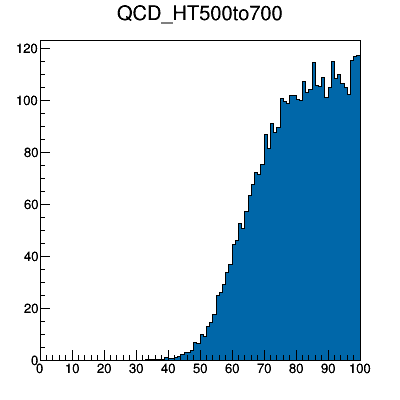

In [6]:
canvas = Canvas(400, 400)
htemp = QCD_HT500to700.Get('dijetMass')
htemp.Draw()
canvas.Draw()

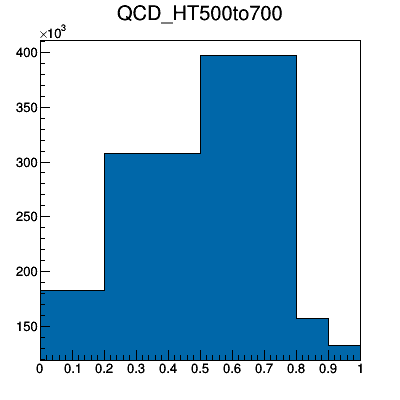

In [7]:
htemp = QCD_HT500to700.Get('cosThetaStar')
htemp.Draw()
canvas.Draw()

Now, complete the exercise making a set of stack plots, either using rootpy's [HistStack](http://www.rootpy.org/reference/generated/rootpy.plotting.HistStack.html) or [StackView](http://www.rootpy.org/reference/generated/rootpy.plotting.views.StackView.html) functionality. You'll want to combine all the MC histograms with the appropriate weights into a single set of histograms. If there's time, figure out how to overlay the data on the MC.